In [1]:
import numpy as np
from scipy.special import sici
import filon
import matplotlib.pyplot as plt
import time
times={}

In [6]:
def testFunc(x,r,a,b):
    return np.log(a*x/b)*np.cos(x*r)

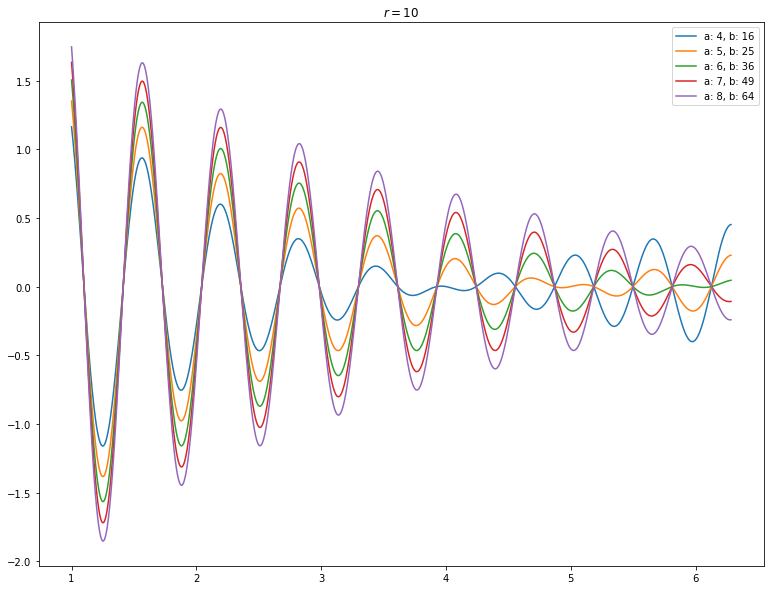

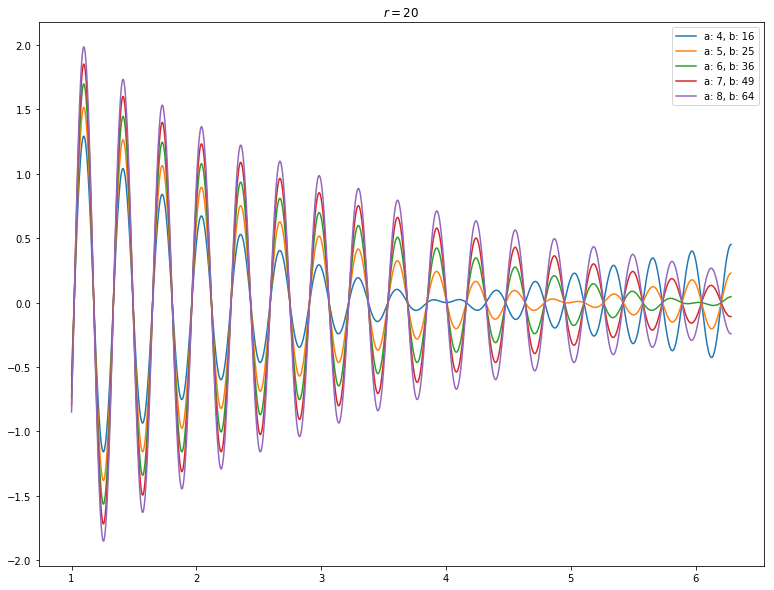

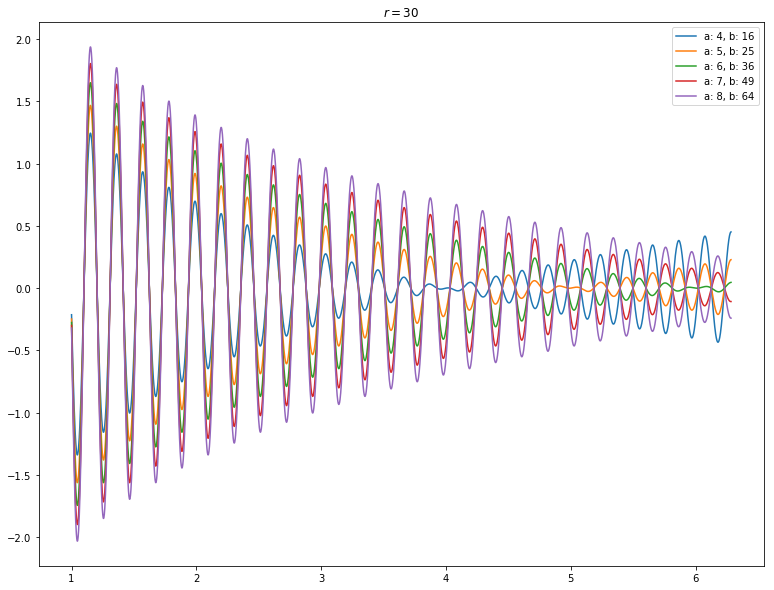

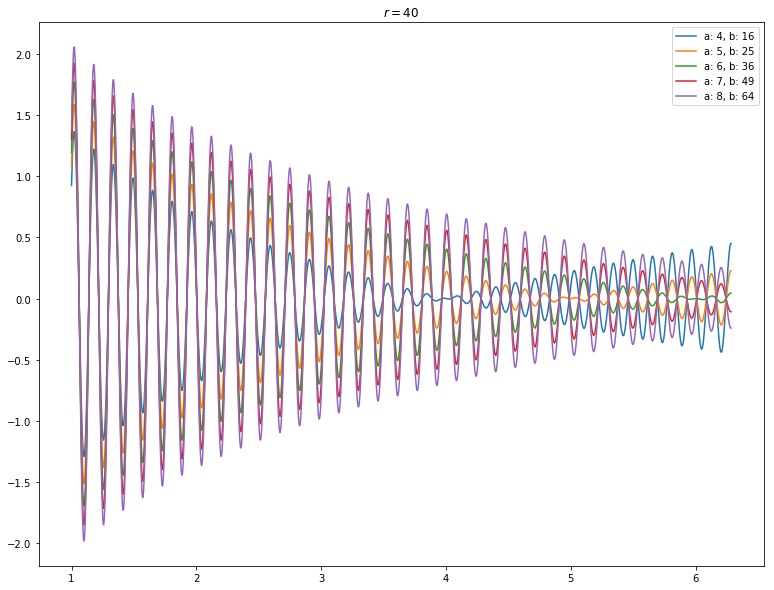

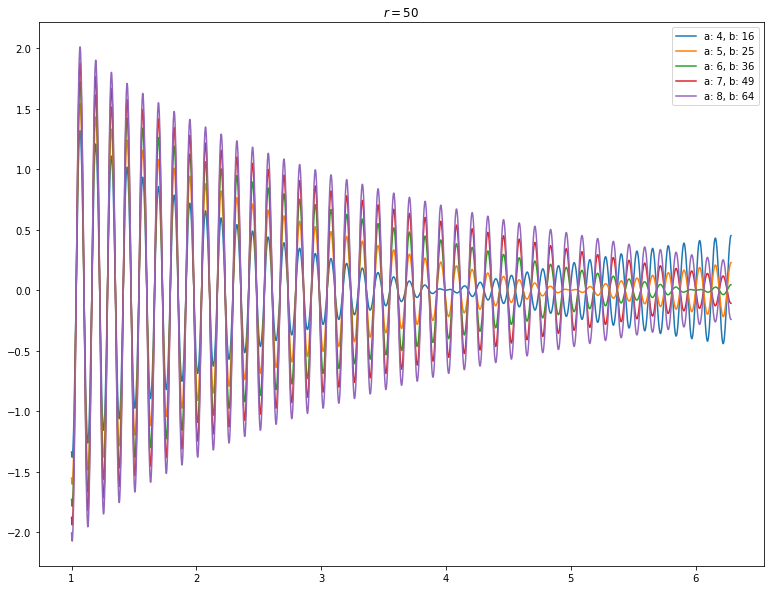

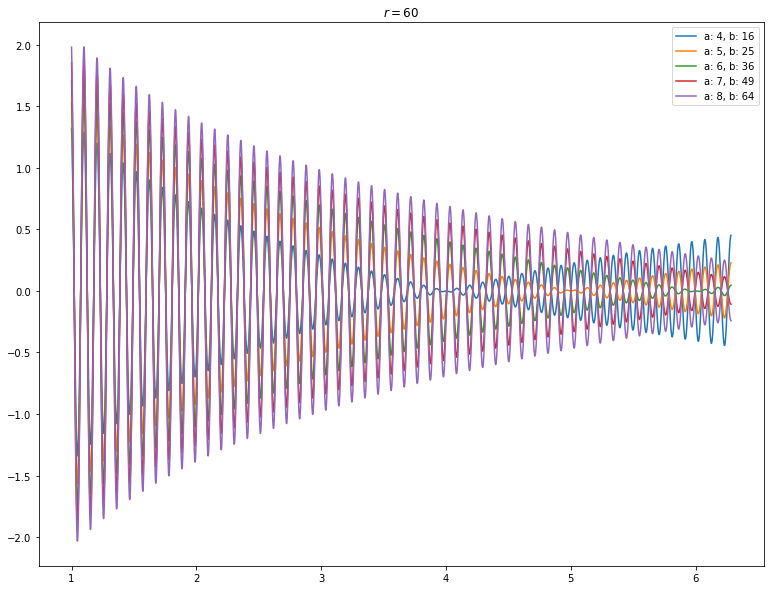

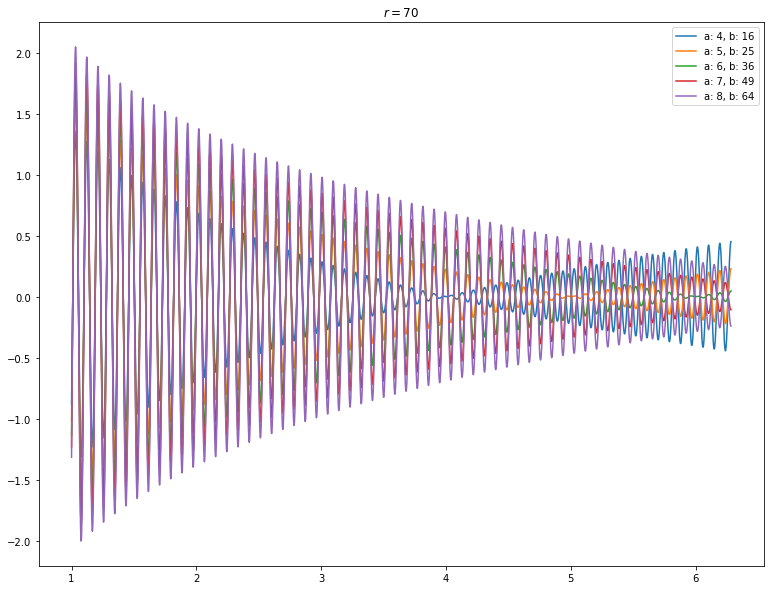

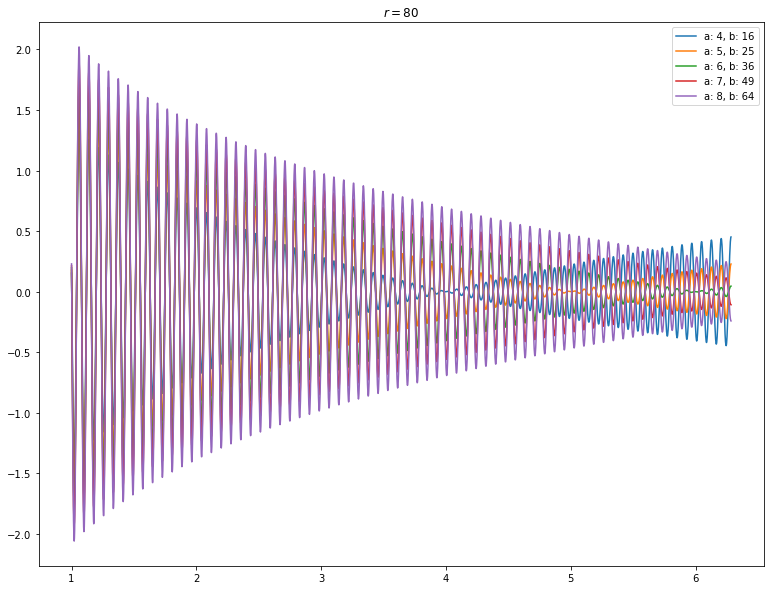

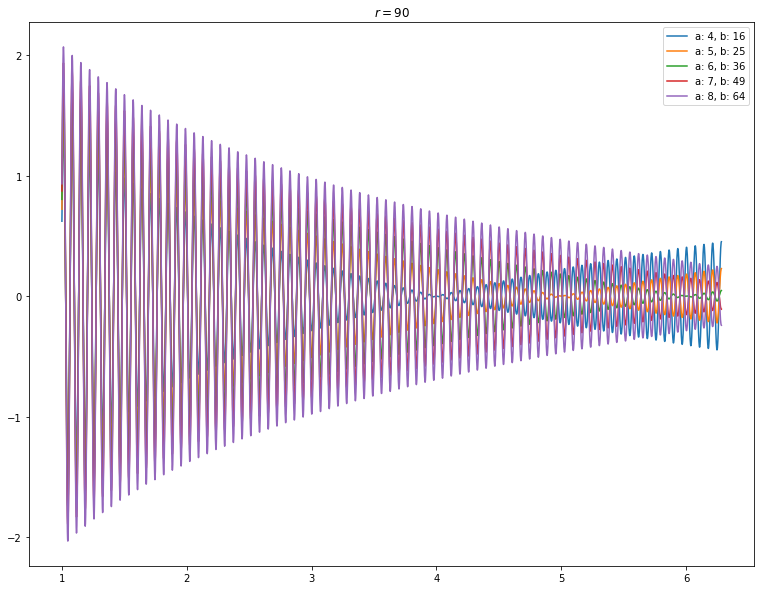

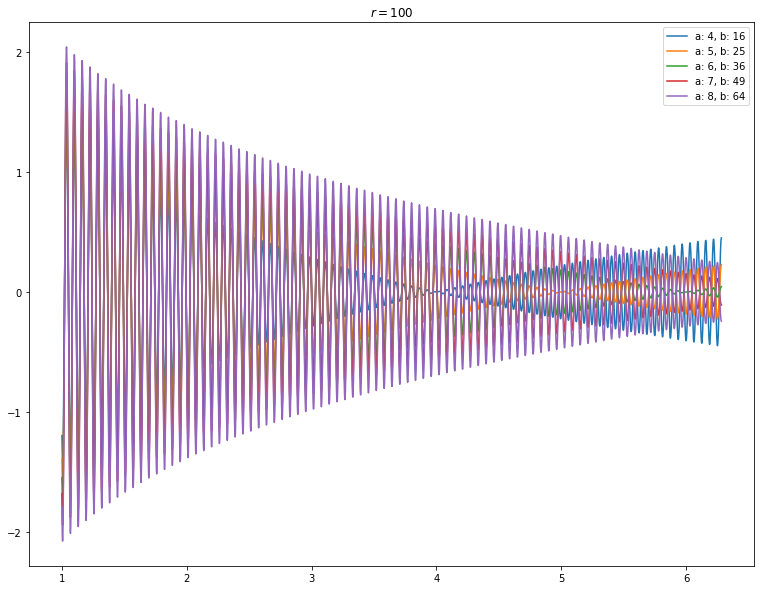

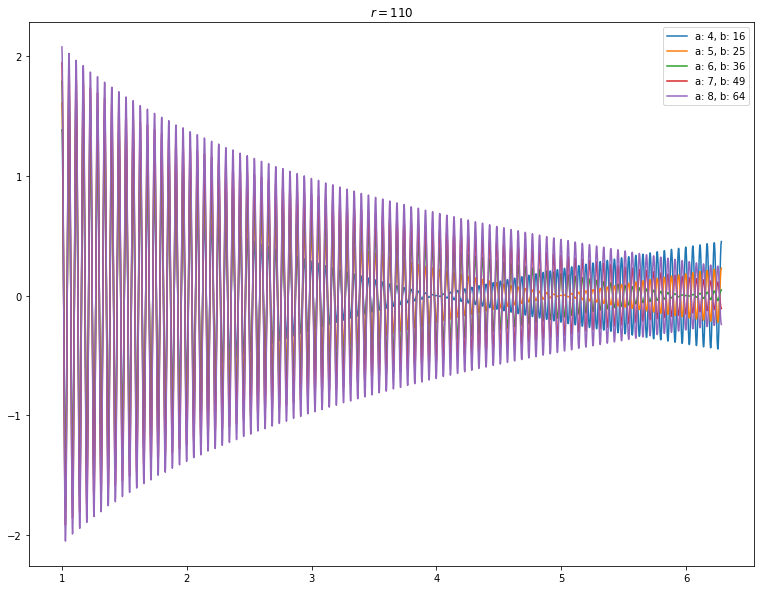

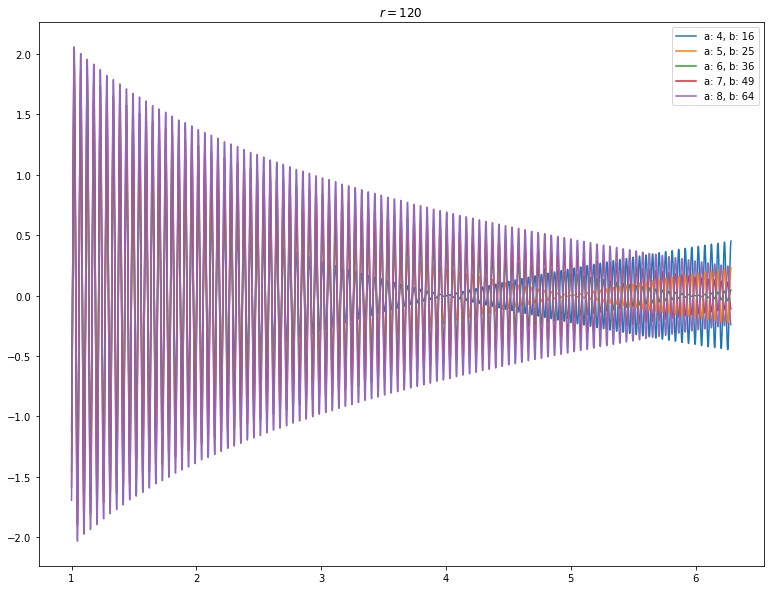

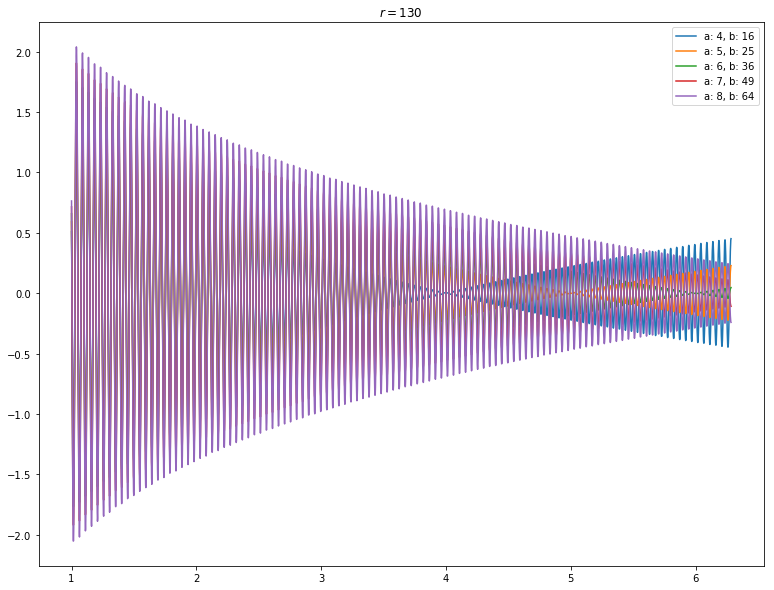

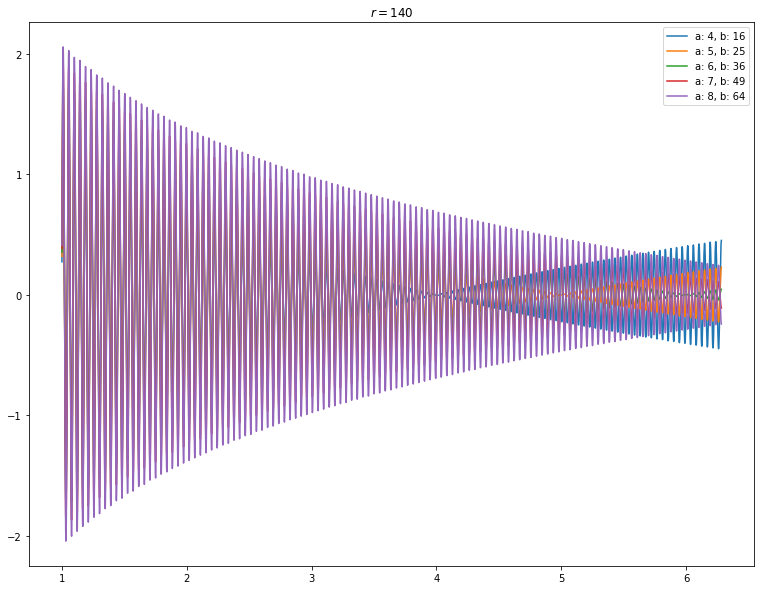

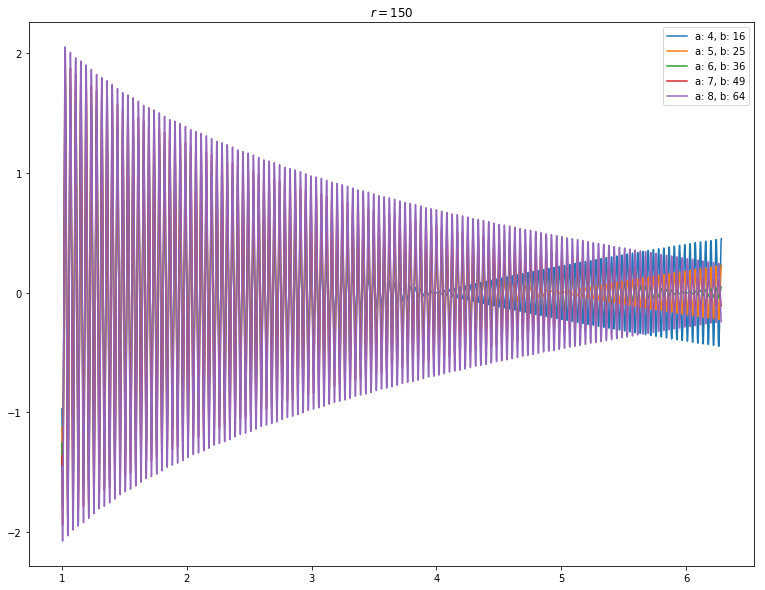

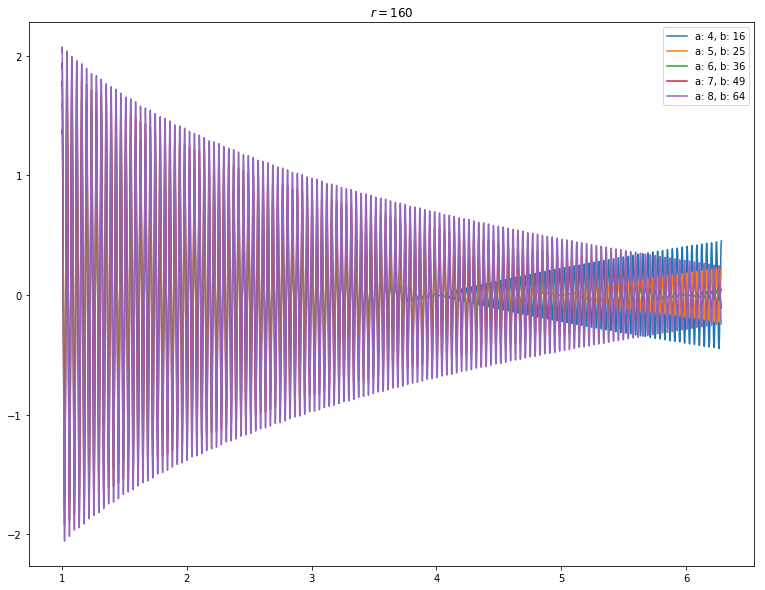

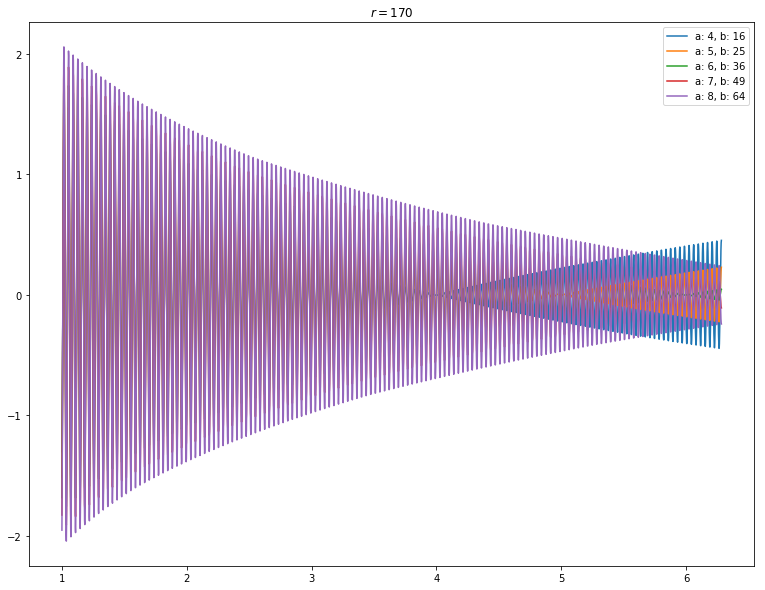

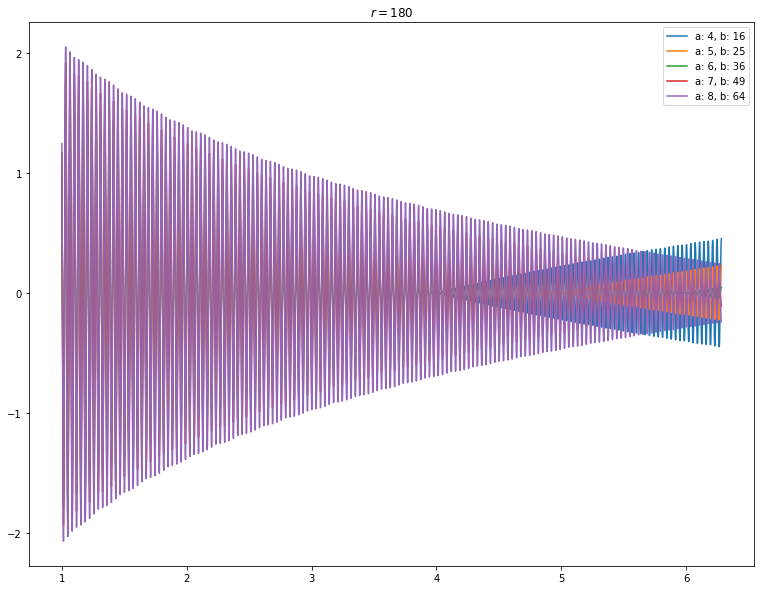

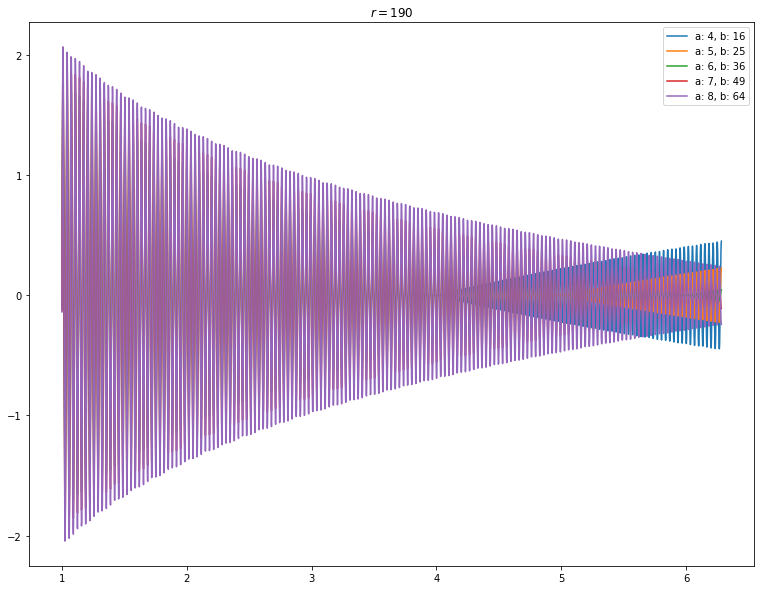

In [13]:
args = np.linspace(1,2.0*np.pi,3000)
for el in np.arange(10,200,10):
    fig = plt.figure(figsize=(13,10))
    for el2 in [4,5,6,7,8]:
        vals = testFunc(args,el,el2,el2**2)
        plt.plot(args,vals,label="a: %s, b: %s"%(el2,el2**2))
    plt.title("$r = %s$"%el)
    plt.legend()
    plt.show()


In [8]:
def exactINDEF(r,a,b,x):
    an=a/b
    return (np.log(an*x)*np.sin(r*x) - sici(r*x)[0])/r

def exact(r,a,b,low,up):
    return exactINDEF(r,a,b,up) - exactINDEF(r,a,b,low)



exact solution
-------------

In [10]:
rArr = np.arange(10,200,1)
aArr = np.arange(101) + np.ones(101)
bArr = aArr**2
rGrid = rArr[:,np.newaxis]
aGrid = aArr[np.newaxis,:]
bGrid = bArr[np.newaxis,:]


In [11]:
start = time.time()
resEall = exact(rGrid,aGrid,bGrid,1,2.0*np.pi)
end = time.time() - start
times['exactAll'] = end

filon integration
------------

In [12]:
def integrand(a,b,x):
    return np.log(a*x/b)

def filonIntAll(r,a,b,low,up,n=1001): 
    aGrid = a[np.newaxis,:]
    bGrid = b[np.newaxis,:]
    args,steps = np.linspace(low,up,n,retstep=True,endpoint=True)
    argsGrid = args[:,np.newaxis]
    intArr = integrand(aGrid,bGrid,argsGrid)
    #print intArr.shape
    res = filon.cos_integral(intArr,steps,r,low,axis=0)
    #print a.shape
    return res

In [14]:
start = time.time()
resFall = filonIntAll(rArr,aArr,bArr,1,2.0*np.pi)
end = time.time() - start
times['filonAll'] = end

In [15]:
ind = 0
for ir,rel in enumerate(rArr):
    for ia,ael in enumerate(aArr):
        print "%d:\t %1.4e\t%1.4e\t%1.4e\t| %1.4e \t%1.4e \t| %1.4e \t%1.4e"%(ind,rel,ael,bArr[ia],resFall[ir][ia],resEall[ir][ia],resFall[ir][ia]-resEall[ir][ia],np.abs((resFall[ir][ia]-resEall[ir][ia])/(resFall[ir][ia]+resEall[ir][ia])))
        ind+=1
calls = len(rArr) * len(aArr)
print "full time (%d calls):  \t%1.4e | %1.4e"%(calls,times['filonAll'],times['exactAll'])
print "time per call:         \t\t%1.4e | %1.4e"%(times['filonAll']/calls,times['exactAll']/calls)

0:	 1.0000e+01	1.0000e+00	1.0000e+00	| 1.0346e-02 	1.0346e-02 	| 3.0728e-11 	1.4851e-09
1:	 1.0000e+01	2.0000e+00	4.0000e+00	| -2.7363e-02 	-2.7363e-02 	| 3.0732e-11 	5.6156e-10
2:	 1.0000e+01	3.0000e+00	9.0000e+00	| -4.9421e-02 	-4.9421e-02 	| 3.0734e-11 	3.1094e-10
3:	 1.0000e+01	4.0000e+00	1.6000e+01	| -6.5071e-02 	-6.5071e-02 	| 3.0735e-11 	2.3617e-10
4:	 1.0000e+01	5.0000e+00	2.5000e+01	| -7.7211e-02 	-7.7211e-02 	| 3.0736e-11 	1.9904e-10
5:	 1.0000e+01	6.0000e+00	3.6000e+01	| -8.7130e-02 	-8.7130e-02 	| 3.0737e-11 	1.7639e-10
6:	 1.0000e+01	7.0000e+00	4.9000e+01	| -9.5516e-02 	-9.5516e-02 	| 3.0738e-11 	1.6090e-10
7:	 1.0000e+01	8.0000e+00	6.4000e+01	| -1.0278e-01 	-1.0278e-01 	| 3.0738e-11 	1.4953e-10
8:	 1.0000e+01	9.0000e+00	8.1000e+01	| -1.0919e-01 	-1.0919e-01 	| 3.0739e-11 	1.4076e-10
9:	 1.0000e+01	1.0000e+01	1.0000e+02	| -1.1492e-01 	-1.1492e-01 	| 3.0740e-11 	1.3374e-10
10:	 1.0000e+01	1.1000e+01	1.2100e+02	| -1.2010e-01 	-1.2010e-01 	| 3.0740e-11 	1.2797e-10
11:	 1.0000

1065:	 2.0000e+01	5.6000e+01	3.1360e+03	| 1.8302e-01 	1.8302e-01 	| -1.7096e-11 	4.6705e-11
1066:	 2.0000e+01	5.7000e+01	3.2490e+03	| 1.8382e-01 	1.8382e-01 	| -1.7096e-11 	4.6501e-11
1067:	 2.0000e+01	5.8000e+01	3.3640e+03	| 1.8462e-01 	1.8462e-01 	| -1.7096e-11 	4.6300e-11
1068:	 2.0000e+01	5.9000e+01	3.4810e+03	| 1.8540e-01 	1.8540e-01 	| -1.7096e-11 	4.6105e-11
1069:	 2.0000e+01	6.0000e+01	3.6000e+03	| 1.8617e-01 	1.8617e-01 	| -1.7096e-11 	4.5916e-11
1070:	 2.0000e+01	6.1000e+01	3.7210e+03	| 1.8692e-01 	1.8692e-01 	| -1.7096e-11 	4.5731e-11
1071:	 2.0000e+01	6.2000e+01	3.8440e+03	| 1.8766e-01 	1.8766e-01 	| -1.7096e-11 	4.5550e-11
1072:	 2.0000e+01	6.3000e+01	3.9690e+03	| 1.8839e-01 	1.8839e-01 	| -1.7096e-11 	4.5374e-11
1073:	 2.0000e+01	6.4000e+01	4.0960e+03	| 1.8911e-01 	1.8911e-01 	| -1.7096e-11 	4.5201e-11
1074:	 2.0000e+01	6.5000e+01	4.2250e+03	| 1.8982e-01 	1.8982e-01 	| -1.7096e-11 	4.5033e-11
1075:	 2.0000e+01	6.6000e+01	4.3560e+03	| 1.9052e-01 	1.9052e-01 	| -1.7096e-11 

2153:	 3.1000e+01	3.3000e+01	1.0890e+03	| -4.6342e-02 	-4.6342e-02 	| -3.0342e-11 	3.2737e-10
2154:	 3.1000e+01	3.4000e+01	1.1560e+03	| -4.6732e-02 	-4.6732e-02 	| -3.0342e-11 	3.2464e-10
2155:	 3.1000e+01	3.5000e+01	1.2250e+03	| -4.7109e-02 	-4.7109e-02 	| -3.0342e-11 	3.2204e-10
2156:	 3.1000e+01	3.6000e+01	1.2960e+03	| -4.7477e-02 	-4.7477e-02 	| -3.0342e-11 	3.1955e-10
2157:	 3.1000e+01	3.7000e+01	1.3690e+03	| -4.7834e-02 	-4.7834e-02 	| -3.0342e-11 	3.1716e-10
2158:	 3.1000e+01	3.8000e+01	1.4440e+03	| -4.8181e-02 	-4.8181e-02 	| -3.0342e-11 	3.1487e-10
2159:	 3.1000e+01	3.9000e+01	1.5210e+03	| -4.8520e-02 	-4.8520e-02 	| -3.0342e-11 	3.1268e-10
2160:	 3.1000e+01	4.0000e+01	1.6000e+03	| -4.8850e-02 	-4.8850e-02 	| -3.0342e-11 	3.1057e-10
2161:	 3.1000e+01	4.1000e+01	1.6810e+03	| -4.9172e-02 	-4.9172e-02 	| -3.0342e-11 	3.0853e-10
2162:	 3.1000e+01	4.2000e+01	1.7640e+03	| -4.9486e-02 	-4.9486e-02 	| -3.0342e-11 	3.0658e-10
2163:	 3.1000e+01	4.3000e+01	1.8490e+03	| -4.9792e-02 	-4.97

3005:	 3.9000e+01	7.7000e+01	5.9290e+03	| 1.0726e-01 	1.0726e-01 	| -1.0952e-11 	5.1052e-11
3006:	 3.9000e+01	7.8000e+01	6.0840e+03	| 1.0758e-01 	1.0758e-01 	| -1.0952e-11 	5.0901e-11
3007:	 3.9000e+01	7.9000e+01	6.2410e+03	| 1.0789e-01 	1.0789e-01 	| -1.0952e-11 	5.0753e-11
3008:	 3.9000e+01	8.0000e+01	6.4000e+03	| 1.0821e-01 	1.0821e-01 	| -1.0952e-11 	5.0608e-11
3009:	 3.9000e+01	8.1000e+01	6.5610e+03	| 1.0851e-01 	1.0851e-01 	| -1.0952e-11 	5.0464e-11
3010:	 3.9000e+01	8.2000e+01	6.7240e+03	| 1.0882e-01 	1.0882e-01 	| -1.0952e-11 	5.0324e-11
3011:	 3.9000e+01	8.3000e+01	6.8890e+03	| 1.0911e-01 	1.0911e-01 	| -1.0952e-11 	5.0186e-11
3012:	 3.9000e+01	8.4000e+01	7.0560e+03	| 1.0941e-01 	1.0941e-01 	| -1.0952e-11 	5.0049e-11
3013:	 3.9000e+01	8.5000e+01	7.2250e+03	| 1.0970e-01 	1.0970e-01 	| -1.0952e-11 	4.9916e-11
3014:	 3.9000e+01	8.6000e+01	7.3960e+03	| 1.0999e-01 	1.0999e-01 	| -1.0952e-11 	4.9786e-11
3015:	 3.9000e+01	8.7000e+01	7.5690e+03	| 1.1028e-01 	1.1028e-01 	| -1.0952e-11 

3942:	 4.9000e+01	4.0000e+00	1.6000e+01	| -2.7034e-02 	-2.7034e-02 	| -8.8224e-12 	1.6317e-10
3943:	 4.9000e+01	5.0000e+00	2.5000e+01	| -3.1377e-02 	-3.1377e-02 	| -8.8229e-12 	1.4059e-10
3944:	 4.9000e+01	6.0000e+00	3.6000e+01	| -3.4926e-02 	-3.4926e-02 	| -8.8234e-12 	1.2632e-10
3945:	 4.9000e+01	7.0000e+00	4.9000e+01	| -3.7927e-02 	-3.7927e-02 	| -8.8237e-12 	1.1633e-10
3946:	 4.9000e+01	8.0000e+00	6.4000e+01	| -4.0526e-02 	-4.0526e-02 	| -8.8239e-12 	1.0887e-10
3947:	 4.9000e+01	9.0000e+00	8.1000e+01	| -4.2818e-02 	-4.2818e-02 	| -8.8243e-12 	1.0304e-10
3948:	 4.9000e+01	1.0000e+01	1.0000e+02	| -4.4869e-02 	-4.4869e-02 	| -8.8244e-12 	9.8336e-11
3949:	 4.9000e+01	1.1000e+01	1.2100e+02	| -4.6724e-02 	-4.6724e-02 	| -8.8247e-12 	9.4434e-11
3950:	 4.9000e+01	1.2000e+01	1.4400e+02	| -4.8418e-02 	-4.8418e-02 	| -8.8249e-12 	9.1133e-11
3951:	 4.9000e+01	1.3000e+01	1.6900e+02	| -4.9976e-02 	-4.9976e-02 	| -8.8251e-12 	8.8294e-11
3952:	 4.9000e+01	1.4000e+01	1.9600e+02	| -5.1418e-02 	-5.14

4693:	 5.6000e+01	4.8000e+01	2.3040e+03	| -3.6272e-02 	-3.6272e-02 	| -2.8874e-11 	3.9802e-10
4694:	 5.6000e+01	4.9000e+01	2.4010e+03	| -3.6464e-02 	-3.6464e-02 	| -2.8874e-11 	3.9592e-10
4695:	 5.6000e+01	5.0000e+01	2.5000e+03	| -3.6652e-02 	-3.6652e-02 	| -2.8874e-11 	3.9389e-10
4696:	 5.6000e+01	5.1000e+01	2.6010e+03	| -3.6837e-02 	-3.6837e-02 	| -2.8874e-11 	3.9192e-10
4697:	 5.6000e+01	5.2000e+01	2.7040e+03	| -3.7018e-02 	-3.7018e-02 	| -2.8874e-11 	3.9001e-10
4698:	 5.6000e+01	5.3000e+01	2.8090e+03	| -3.7195e-02 	-3.7195e-02 	| -2.8874e-11 	3.8815e-10
4699:	 5.6000e+01	5.4000e+01	2.9160e+03	| -3.7369e-02 	-3.7369e-02 	| -2.8875e-11 	3.8634e-10
4700:	 5.6000e+01	5.5000e+01	3.0250e+03	| -3.7540e-02 	-3.7540e-02 	| -2.8875e-11 	3.8458e-10
4701:	 5.6000e+01	5.6000e+01	3.1360e+03	| -3.7708e-02 	-3.7708e-02 	| -2.8875e-11 	3.8287e-10
4702:	 5.6000e+01	5.7000e+01	3.2490e+03	| -3.7873e-02 	-3.7873e-02 	| -2.8875e-11 	3.8121e-10
4703:	 5.6000e+01	5.8000e+01	3.3640e+03	| -3.8035e-02 	-3.80

5463:	 6.4000e+01	1.0000e+01	1.0000e+02	| 3.3040e-02 	3.3040e-02 	| -1.4622e-11 	2.2127e-10
5464:	 6.4000e+01	1.1000e+01	1.2100e+02	| 3.4410e-02 	3.4410e-02 	| -1.4622e-11 	2.1246e-10
5465:	 6.4000e+01	1.2000e+01	1.4400e+02	| 3.5661e-02 	3.5661e-02 	| -1.4622e-11 	2.0501e-10
5466:	 6.4000e+01	1.3000e+01	1.6900e+02	| 3.6812e-02 	3.6812e-02 	| -1.4622e-11 	1.9860e-10
5467:	 6.4000e+01	1.4000e+01	1.9600e+02	| 3.7877e-02 	3.7877e-02 	| -1.4622e-11 	1.9301e-10
5468:	 6.4000e+01	1.5000e+01	2.2500e+02	| 3.8869e-02 	3.8869e-02 	| -1.4622e-11 	1.8809e-10
5469:	 6.4000e+01	1.6000e+01	2.5600e+02	| 3.9797e-02 	3.9797e-02 	| -1.4622e-11 	1.8371e-10
5470:	 6.4000e+01	1.7000e+01	2.8900e+02	| 4.0668e-02 	4.0668e-02 	| -1.4622e-11 	1.7977e-10
5471:	 6.4000e+01	1.8000e+01	3.2400e+02	| 4.1490e-02 	4.1490e-02 	| -1.4622e-11 	1.7621e-10
5472:	 6.4000e+01	1.9000e+01	3.6100e+02	| 4.2267e-02 	4.2267e-02 	| -1.4622e-11 	1.7297e-10
5473:	 6.4000e+01	2.0000e+01	4.0000e+02	| 4.3005e-02 	4.3005e-02 	| -1.4622e-11 

6258:	 7.1000e+01	9.8000e+01	9.6040e+03	| 6.1506e-02 	6.1506e-02 	| 9.9732e-12 	8.1075e-11
6259:	 7.1000e+01	9.9000e+01	9.8010e+03	| 6.1642e-02 	6.1642e-02 	| 9.9733e-12 	8.0896e-11
6260:	 7.1000e+01	1.0000e+02	1.0000e+04	| 6.1777e-02 	6.1777e-02 	| 9.9732e-12 	8.0719e-11
6261:	 7.1000e+01	1.0100e+02	1.0201e+04	| 6.1910e-02 	6.1910e-02 	| 9.9733e-12 	8.0547e-11
6262:	 7.2000e+01	1.0000e+00	1.0000e+00	| 2.1653e-04 	2.1653e-04 	| 3.3785e-11 	7.8013e-08
6263:	 7.2000e+01	2.0000e+00	4.0000e+00	| 2.6601e-03 	2.6601e-03 	| 3.3784e-11 	6.3502e-09
6264:	 7.2000e+01	3.0000e+00	9.0000e+00	| 4.0895e-03 	4.0895e-03 	| 3.3784e-11 	4.1306e-09
6265:	 7.2000e+01	4.0000e+00	1.6000e+01	| 5.1037e-03 	5.1037e-03 	| 3.3784e-11 	3.3098e-09
6266:	 7.2000e+01	5.0000e+00	2.5000e+01	| 5.8903e-03 	5.8903e-03 	| 3.3784e-11 	2.8677e-09
6267:	 7.2000e+01	6.0000e+00	3.6000e+01	| 6.5331e-03 	6.5331e-03 	| 3.3784e-11 	2.5856e-09
6268:	 7.2000e+01	7.0000e+00	4.9000e+01	| 7.0765e-03 	7.0765e-03 	| 3.3783e-11 	2.3870e-09

7305:	 8.2000e+01	3.4000e+01	1.1560e+03	| 1.3352e-02 	1.3352e-02 	| -3.3573e-11 	1.2572e-09
7306:	 8.2000e+01	3.5000e+01	1.2250e+03	| 1.3463e-02 	1.3463e-02 	| -3.3573e-11 	1.2469e-09
7307:	 8.2000e+01	3.6000e+01	1.2960e+03	| 1.3570e-02 	1.3570e-02 	| -3.3573e-11 	1.2370e-09
7308:	 8.2000e+01	3.7000e+01	1.3690e+03	| 1.3675e-02 	1.3675e-02 	| -3.3573e-11 	1.2275e-09
7309:	 8.2000e+01	3.8000e+01	1.4440e+03	| 1.3777e-02 	1.3777e-02 	| -3.3573e-11 	1.2184e-09
7310:	 8.2000e+01	3.9000e+01	1.5210e+03	| 1.3876e-02 	1.3876e-02 	| -3.3573e-11 	1.2097e-09
7311:	 8.2000e+01	4.0000e+01	1.6000e+03	| 1.3973e-02 	1.3973e-02 	| -3.3573e-11 	1.2014e-09
7312:	 8.2000e+01	4.1000e+01	1.6810e+03	| 1.4067e-02 	1.4067e-02 	| -3.3573e-11 	1.1933e-09
7313:	 8.2000e+01	4.2000e+01	1.7640e+03	| 1.4159e-02 	1.4159e-02 	| -3.3573e-11 	1.1855e-09
7314:	 8.2000e+01	4.3000e+01	1.8490e+03	| 1.4249e-02 	1.4249e-02 	| -3.3573e-11 	1.1781e-09
7315:	 8.2000e+01	4.4000e+01	1.9360e+03	| 1.4337e-02 	1.4337e-02 	| -3.3573e-11 

8238:	 9.1000e+01	5.8000e+01	3.3640e+03	| 4.8683e-03 	4.8683e-03 	| 3.5226e-11 	3.6178e-09
8239:	 9.1000e+01	5.9000e+01	3.4810e+03	| 4.8882e-03 	4.8882e-03 	| 3.5226e-11 	3.6031e-09
8240:	 9.1000e+01	6.0000e+01	3.6000e+03	| 4.9078e-03 	4.9078e-03 	| 3.5225e-11 	3.5887e-09
8241:	 9.1000e+01	6.1000e+01	3.7210e+03	| 4.9271e-03 	4.9271e-03 	| 3.5225e-11 	3.5747e-09
8242:	 9.1000e+01	6.2000e+01	3.8440e+03	| 4.9460e-03 	4.9460e-03 	| 3.5225e-11 	3.5610e-09
8243:	 9.1000e+01	6.3000e+01	3.9690e+03	| 4.9646e-03 	4.9646e-03 	| 3.5225e-11 	3.5476e-09
8244:	 9.1000e+01	6.4000e+01	4.0960e+03	| 4.9830e-03 	4.9830e-03 	| 3.5225e-11 	3.5346e-09
8245:	 9.1000e+01	6.5000e+01	4.2250e+03	| 5.0010e-03 	5.0010e-03 	| 3.5225e-11 	3.5218e-09
8246:	 9.1000e+01	6.6000e+01	4.3560e+03	| 5.0188e-03 	5.0188e-03 	| 3.5225e-11 	3.5093e-09
8247:	 9.1000e+01	6.7000e+01	4.4890e+03	| 5.0363e-03 	5.0363e-03 	| 3.5225e-11 	3.4971e-09
8248:	 9.1000e+01	6.8000e+01	4.6240e+03	| 5.0536e-03 	5.0536e-03 	| 3.5225e-11 	3.4852e-09

8754:	 9.6000e+01	6.9000e+01	4.7610e+03	| 4.3417e-02 	4.3417e-02 	| 5.8109e-12 	6.6919e-11
8755:	 9.6000e+01	7.0000e+01	4.9000e+03	| 4.3565e-02 	4.3565e-02 	| 5.8109e-12 	6.6693e-11
8756:	 9.6000e+01	7.1000e+01	5.0410e+03	| 4.3710e-02 	4.3710e-02 	| 5.8109e-12 	6.6472e-11
8757:	 9.6000e+01	7.2000e+01	5.1840e+03	| 4.3853e-02 	4.3853e-02 	| 5.8109e-12 	6.6254e-11
8758:	 9.6000e+01	7.3000e+01	5.3290e+03	| 4.3995e-02 	4.3995e-02 	| 5.8108e-12 	6.6040e-11
8759:	 9.6000e+01	7.4000e+01	5.4760e+03	| 4.4134e-02 	4.4134e-02 	| 5.8108e-12 	6.5832e-11
8760:	 9.6000e+01	7.5000e+01	5.6250e+03	| 4.4271e-02 	4.4271e-02 	| 5.8108e-12 	6.5627e-11
8761:	 9.6000e+01	7.6000e+01	5.7760e+03	| 4.4407e-02 	4.4407e-02 	| 5.8108e-12 	6.5426e-11
8762:	 9.6000e+01	7.7000e+01	5.9290e+03	| 4.4541e-02 	4.4541e-02 	| 5.8108e-12 	6.5230e-11
8763:	 9.6000e+01	7.8000e+01	6.0840e+03	| 4.4673e-02 	4.4673e-02 	| 5.8108e-12 	6.5037e-11
8764:	 9.6000e+01	7.9000e+01	6.2410e+03	| 4.4804e-02 	4.4804e-02 	| 5.8109e-12 	6.4848e-11

9930:	 1.0800e+02	3.3000e+01	1.0890e+03	| 2.9987e-02 	2.9987e-02 	| -1.3900e-11 	2.3177e-10
9931:	 1.0800e+02	3.4000e+01	1.1560e+03	| 3.0243e-02 	3.0243e-02 	| -1.3900e-11 	2.2981e-10
9932:	 1.0800e+02	3.5000e+01	1.2250e+03	| 3.0491e-02 	3.0491e-02 	| -1.3901e-11 	2.2795e-10
9933:	 1.0800e+02	3.6000e+01	1.2960e+03	| 3.0733e-02 	3.0733e-02 	| -1.3902e-11 	2.2617e-10
9934:	 1.0800e+02	3.7000e+01	1.3690e+03	| 3.0968e-02 	3.0968e-02 	| -1.3902e-11 	2.2445e-10
9935:	 1.0800e+02	3.8000e+01	1.4440e+03	| 3.1197e-02 	3.1197e-02 	| -1.3903e-11 	2.2282e-10
9936:	 1.0800e+02	3.9000e+01	1.5210e+03	| 3.1420e-02 	3.1420e-02 	| -1.3903e-11 	2.2124e-10
9937:	 1.0800e+02	4.0000e+01	1.6000e+03	| 3.1637e-02 	3.1637e-02 	| -1.3904e-11 	2.1973e-10
9938:	 1.0800e+02	4.1000e+01	1.6810e+03	| 3.1849e-02 	3.1849e-02 	| -1.3904e-11 	2.1828e-10
9939:	 1.0800e+02	4.2000e+01	1.7640e+03	| 3.2056e-02 	3.2056e-02 	| -1.3905e-11 	2.1688e-10
9940:	 1.0800e+02	4.3000e+01	1.8490e+03	| 3.2258e-02 	3.2258e-02 	| -1.3905e-11 

10938:	 1.1800e+02	3.1000e+01	9.6100e+02	| -2.8578e-02 	-2.8578e-02 	| -6.0829e-12 	1.0643e-10
10939:	 1.1800e+02	3.2000e+01	1.0240e+03	| -2.8842e-02 	-2.8842e-02 	| -6.0829e-12 	1.0545e-10
10940:	 1.1800e+02	3.3000e+01	1.0890e+03	| -2.9098e-02 	-2.9098e-02 	| -6.0829e-12 	1.0452e-10
10941:	 1.1800e+02	3.4000e+01	1.1560e+03	| -2.9347e-02 	-2.9347e-02 	| -6.0828e-12 	1.0364e-10
10942:	 1.1800e+02	3.5000e+01	1.2250e+03	| -2.9588e-02 	-2.9588e-02 	| -6.0828e-12 	1.0279e-10
10943:	 1.1800e+02	3.6000e+01	1.2960e+03	| -2.9822e-02 	-2.9822e-02 	| -6.0827e-12 	1.0198e-10
10944:	 1.1800e+02	3.7000e+01	1.3690e+03	| -3.0050e-02 	-3.0050e-02 	| -6.0828e-12 	1.0121e-10
10945:	 1.1800e+02	3.8000e+01	1.4440e+03	| -3.0272e-02 	-3.0272e-02 	| -6.0826e-12 	1.0047e-10
10946:	 1.1800e+02	3.9000e+01	1.5210e+03	| -3.0488e-02 	-3.0488e-02 	| -6.0826e-12 	9.9754e-11
10947:	 1.1800e+02	4.0000e+01	1.6000e+03	| -3.0699e-02 	-3.0699e-02 	| -6.0826e-12 	9.9068e-11
10948:	 1.1800e+02	4.1000e+01	1.6810e+03	| -3.0905

12076:	 1.2900e+02	5.8000e+01	3.3640e+03	| -6.0212e-03 	-6.0212e-03 	| 3.5770e-11 	2.9704e-09
12077:	 1.2900e+02	5.9000e+01	3.4810e+03	| -6.0469e-03 	-6.0469e-03 	| 3.5770e-11 	2.9578e-09
12078:	 1.2900e+02	6.0000e+01	3.6000e+03	| -6.0721e-03 	-6.0721e-03 	| 3.5770e-11 	2.9455e-09
12079:	 1.2900e+02	6.1000e+01	3.7210e+03	| -6.0969e-03 	-6.0969e-03 	| 3.5770e-11 	2.9335e-09
12080:	 1.2900e+02	6.2000e+01	3.8440e+03	| -6.1212e-03 	-6.1212e-03 	| 3.5770e-11 	2.9218e-09
12081:	 1.2900e+02	6.3000e+01	3.9690e+03	| -6.1452e-03 	-6.1452e-03 	| 3.5770e-11 	2.9104e-09
12082:	 1.2900e+02	6.4000e+01	4.0960e+03	| -6.1689e-03 	-6.1689e-03 	| 3.5770e-11 	2.8993e-09
12083:	 1.2900e+02	6.5000e+01	4.2250e+03	| -6.1921e-03 	-6.1921e-03 	| 3.5770e-11 	2.8884e-09
12084:	 1.2900e+02	6.6000e+01	4.3560e+03	| -6.2150e-03 	-6.2150e-03 	| 3.5770e-11 	2.8777e-09
12085:	 1.2900e+02	6.7000e+01	4.4890e+03	| -6.2376e-03 	-6.2376e-03 	| 3.5770e-11 	2.8673e-09
12086:	 1.2900e+02	6.8000e+01	4.6240e+03	| -6.2598e-03 	-6.2

12774:	 1.3600e+02	4.9000e+01	2.4010e+03	| -2.2577e-02 	-2.2577e-02 	| 2.2826e-11 	5.0552e-10
12775:	 1.3600e+02	5.0000e+01	2.5000e+03	| -2.2695e-02 	-2.2695e-02 	| 2.2827e-11 	5.0291e-10
12776:	 1.3600e+02	5.1000e+01	2.6010e+03	| -2.2810e-02 	-2.2810e-02 	| 2.2827e-11 	5.0037e-10
12777:	 1.3600e+02	5.2000e+01	2.7040e+03	| -2.2923e-02 	-2.2923e-02 	| 2.2827e-11 	4.9791e-10
12778:	 1.3600e+02	5.3000e+01	2.8090e+03	| -2.3033e-02 	-2.3033e-02 	| 2.2827e-11 	4.9552e-10
12779:	 1.3600e+02	5.4000e+01	2.9160e+03	| -2.3142e-02 	-2.3142e-02 	| 2.2827e-11 	4.9320e-10
12780:	 1.3600e+02	5.5000e+01	3.0250e+03	| -2.3249e-02 	-2.3249e-02 	| 2.2827e-11 	4.9093e-10
12781:	 1.3600e+02	5.6000e+01	3.1360e+03	| -2.3353e-02 	-2.3353e-02 	| 2.2827e-11 	4.8873e-10
12782:	 1.3600e+02	5.7000e+01	3.2490e+03	| -2.3456e-02 	-2.3456e-02 	| 2.2827e-11 	4.8659e-10
12783:	 1.3600e+02	5.8000e+01	3.3640e+03	| -2.3557e-02 	-2.3557e-02 	| 2.2827e-11 	4.8451e-10
12784:	 1.3600e+02	5.9000e+01	3.4810e+03	| -2.3657e-02 	-2.3

13990:	 1.4800e+02	5.3000e+01	2.8090e+03	| -9.0259e-03 	-9.0259e-03 	| 3.4882e-11 	1.9323e-09
13991:	 1.4800e+02	5.4000e+01	2.9160e+03	| -9.0686e-03 	-9.0686e-03 	| 3.4882e-11 	1.9232e-09
13992:	 1.4800e+02	5.5000e+01	3.0250e+03	| -9.1106e-03 	-9.1106e-03 	| 3.4882e-11 	1.9144e-09
13993:	 1.4800e+02	5.6000e+01	3.1360e+03	| -9.1518e-03 	-9.1518e-03 	| 3.4882e-11 	1.9058e-09
13994:	 1.4800e+02	5.7000e+01	3.2490e+03	| -9.1922e-03 	-9.1922e-03 	| 3.4882e-11 	1.8974e-09
13995:	 1.4800e+02	5.8000e+01	3.3640e+03	| -9.2320e-03 	-9.2320e-03 	| 3.4882e-11 	1.8892e-09
13996:	 1.4800e+02	5.9000e+01	3.4810e+03	| -9.2711e-03 	-9.2711e-03 	| 3.4882e-11 	1.8812e-09
13997:	 1.4800e+02	6.0000e+01	3.6000e+03	| -9.3095e-03 	-9.3095e-03 	| 3.4882e-11 	1.8735e-09
13998:	 1.4800e+02	6.1000e+01	3.7210e+03	| -9.3473e-03 	-9.3473e-03 	| 3.4882e-11 	1.8659e-09
13999:	 1.4800e+02	6.2000e+01	3.8440e+03	| -9.3845e-03 	-9.3845e-03 	| 3.4882e-11 	1.8585e-09
14000:	 1.4800e+02	6.3000e+01	3.9690e+03	| -9.4210e-03 	-9.4

15251:	 1.6100e+02	1.0000e+00	1.0000e+00	| 3.3766e-05 	3.3766e-05 	| 2.6875e-11 	3.9797e-07
15252:	 1.6100e+02	2.0000e+00	4.0000e+00	| -2.9903e-03 	-2.9903e-03 	| 2.6874e-11 	4.4936e-09
15253:	 1.6100e+02	3.0000e+00	9.0000e+00	| -4.7592e-03 	-4.7592e-03 	| 2.6874e-11 	2.8233e-09
15254:	 1.6100e+02	4.0000e+00	1.6000e+01	| -6.0143e-03 	-6.0143e-03 	| 2.6873e-11 	2.2341e-09
15255:	 1.6100e+02	5.0000e+00	2.5000e+01	| -6.9879e-03 	-6.9879e-03 	| 2.6873e-11 	1.9228e-09
15256:	 1.6100e+02	6.0000e+00	3.6000e+01	| -7.7833e-03 	-7.7833e-03 	| 2.6873e-11 	1.7263e-09
15257:	 1.6100e+02	7.0000e+00	4.9000e+01	| -8.4558e-03 	-8.4558e-03 	| 2.6873e-11 	1.5890e-09
15258:	 1.6100e+02	8.0000e+00	6.4000e+01	| -9.0384e-03 	-9.0384e-03 	| 2.6873e-11 	1.4866e-09
15259:	 1.6100e+02	9.0000e+00	8.1000e+01	| -9.5522e-03 	-9.5522e-03 	| 2.6872e-11 	1.4066e-09
15260:	 1.6100e+02	1.0000e+01	1.0000e+02	| -1.0012e-02 	-1.0012e-02 	| 2.6872e-11 	1.3420e-09
15261:	 1.6100e+02	1.1000e+01	1.2100e+02	| -1.0428e-02 	-1.042

16638:	 1.7400e+02	7.5000e+01	5.6250e+03	| -2.3220e-02 	-2.3220e-02 	| 1.3674e-11 	2.9446e-10
16639:	 1.7400e+02	7.6000e+01	5.7760e+03	| -2.3291e-02 	-2.3291e-02 	| 1.3674e-11 	2.9356e-10
16640:	 1.7400e+02	7.7000e+01	5.9290e+03	| -2.3361e-02 	-2.3361e-02 	| 1.3675e-11 	2.9268e-10
16641:	 1.7400e+02	7.8000e+01	6.0840e+03	| -2.3431e-02 	-2.3431e-02 	| 1.3675e-11 	2.9181e-10
16642:	 1.7400e+02	7.9000e+01	6.2410e+03	| -2.3499e-02 	-2.3499e-02 	| 1.3675e-11 	2.9096e-10
16643:	 1.7400e+02	8.0000e+01	6.4000e+03	| -2.3567e-02 	-2.3567e-02 	| 1.3675e-11 	2.9013e-10
16644:	 1.7400e+02	8.1000e+01	6.5610e+03	| -2.3634e-02 	-2.3634e-02 	| 1.3675e-11 	2.8931e-10
16645:	 1.7400e+02	8.2000e+01	6.7240e+03	| -2.3700e-02 	-2.3700e-02 	| 1.3675e-11 	2.8851e-10
16646:	 1.7400e+02	8.3000e+01	6.8890e+03	| -2.3765e-02 	-2.3765e-02 	| 1.3675e-11 	2.8771e-10
16647:	 1.7400e+02	8.4000e+01	7.0560e+03	| -2.3829e-02 	-2.3829e-02 	| 1.3675e-11 	2.8694e-10
16648:	 1.7400e+02	8.5000e+01	7.2250e+03	| -2.3893e-02 	-2.3

17627:	 1.8400e+02	5.4000e+01	2.9160e+03	| 2.1183e-02 	2.1183e-02 	| 8.0614e-12 	1.9028e-10
17628:	 1.8400e+02	5.5000e+01	3.0250e+03	| 2.1280e-02 	2.1280e-02 	| 8.0614e-12 	1.8941e-10
17629:	 1.8400e+02	5.6000e+01	3.1360e+03	| 2.1376e-02 	2.1376e-02 	| 8.0613e-12 	1.8856e-10
17630:	 1.8400e+02	5.7000e+01	3.2490e+03	| 2.1469e-02 	2.1469e-02 	| 8.0612e-12 	1.8774e-10
17631:	 1.8400e+02	5.8000e+01	3.3640e+03	| 2.1562e-02 	2.1562e-02 	| 8.0612e-12 	1.8693e-10
17632:	 1.8400e+02	5.9000e+01	3.4810e+03	| 2.1653e-02 	2.1653e-02 	| 8.0611e-12 	1.8615e-10
17633:	 1.8400e+02	6.0000e+01	3.6000e+03	| 2.1742e-02 	2.1742e-02 	| 8.0611e-12 	1.8538e-10
17634:	 1.8400e+02	6.1000e+01	3.7210e+03	| 2.1829e-02 	2.1829e-02 	| 8.0610e-12 	1.8464e-10
17635:	 1.8400e+02	6.2000e+01	3.8440e+03	| 2.1916e-02 	2.1916e-02 	| 8.0610e-12 	1.8391e-10
17636:	 1.8400e+02	6.3000e+01	3.9690e+03	| 2.2001e-02 	2.2001e-02 	| 8.0610e-12 	1.8320e-10
17637:	 1.8400e+02	6.4000e+01	4.0960e+03	| 2.2084e-02 	2.2084e-02 	| 8.0609e-12 

18682:	 1.9400e+02	9.9000e+01	9.8010e+03	| -1.6651e-02 	-1.6651e-02 	| -2.7062e-11 	8.1262e-10
18683:	 1.9400e+02	1.0000e+02	1.0000e+04	| -1.6688e-02 	-1.6688e-02 	| -2.7062e-11 	8.1084e-10
18684:	 1.9400e+02	1.0100e+02	1.0201e+04	| -1.6724e-02 	-1.6724e-02 	| -2.7062e-11 	8.0909e-10
18685:	 1.9500e+02	1.0000e+00	1.0000e+00	| -2.1500e-05 	-2.1500e-05 	| -3.7486e-11 	8.7175e-07
18686:	 1.9500e+02	2.0000e+00	4.0000e+00	| 7.5857e-04 	7.5857e-04 	| -3.7489e-11 	2.4710e-08
18687:	 1.9500e+02	3.0000e+00	9.0000e+00	| 1.2149e-03 	1.2149e-03 	| -3.7491e-11 	1.5430e-08
18688:	 1.9500e+02	4.0000e+00	1.6000e+01	| 1.5386e-03 	1.5386e-03 	| -3.7492e-11 	1.2184e-08
18689:	 1.9500e+02	5.0000e+00	2.5000e+01	| 1.7898e-03 	1.7898e-03 	| -3.7493e-11 	1.0474e-08
18690:	 1.9500e+02	6.0000e+00	3.6000e+01	| 1.9950e-03 	1.9950e-03 	| -3.7494e-11 	9.3973e-09
18691:	 1.9500e+02	7.0000e+00	4.9000e+01	| 2.1684e-03 	2.1684e-03 	| -3.7495e-11 	8.6456e-09
18692:	 1.9500e+02	8.0000e+00	6.4000e+01	| 2.3187e-03 	2.3187e